# 1. Lý thuyết

**1) Để khởi tạo model trong tensorflow chúng ta sử dụng class nào?**

A. Sequential hoặc Model

**2) Điểm khác biệt giữa fit và fit_generator trong tensorflow là gì ?**

A. fit sẽ yêu cầu load toàn bộ dữ liệu lên RAM trong khi fit_generator sẽ sử dụng một hàm generator để sinh dữ liệu tại mỗi mini-batch. Từ đó giúp tiết kiệm bộ nhớ.



**3) Các modules chính trong tensorflow dùng để xây dựng và huấn luyện model.**


B. `tf.keras.layers`: để khởi tạo các layers; `tf.keras.Sequential`: khởi tạo model; `tf.keras.activations`: khởi tạo activation function; `tf.keras.optimizers`: Khởi tạo optimizer cho bài toán tối ưu loss function; `tf.keras.losses`: khởi tạo loss function; `tf.keras.preprocessing`: Preprocessing data.



**4) Các bước trong huấn luyện model bao gồm:**

D. 1. Train/test data split --> 2. Build up model architecture --> 3. Initialize the optimizer algorithm --> 4. Train model on train --> 5. Evaluation on test --> 6. Save and use trained model

**5) Ý nghĩa của tham số epochs và batch_size trong huấn luyện mô hình là gì?**



D. epochs là số lượng vòng lặp, mỗi vòng lặp là một lượt fit mini-batch, trên bộ dữ liệu khi huấn luyện; batch_size là kích thước của một mini-batch.

# Chữa: Câu 5 đáp án đúng phải là C epochs là số lượt lặp lại toàn bộ dữ liệu train khi huấn luyện, batch_size là kích thước của một mini-batch.

# 2. Thực hành

6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3

7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.

8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

9) Từ bộ dữ liệu [Income-Classification](https://www.kaggle.com/t/090688c8d33a40b68be9e271d6ba6bae) hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20. 

10) Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.


In [ ]:
import tensorflow as tf

In [ ]:
# Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3
RGB = tf.random.normal([3, 32, 32], dtype=tf.float32)
print(RGB.shape)

# Truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.
R = RGB[:1, :, :]
G = RGB[1:2, :, :]
B = RGB[-1:, :, :]

#Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.
hadamard = R*G
print(hadamard.shape)
nor_mul = R@G
print(nor_mul.shape)

(3, 32, 32)
(1, 32, 32)
(1, 32, 32)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/DL/lesson2_hautran")

Mounted at /content/drive


In [ ]:
import pandas as pd
income_data = pd.read_csv('data/train.csv').dropna()

In [ ]:
income_data.head()

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income
0,0,45,Private,175925,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US,0
1,1,23,Private,113601,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,M,0,0,30,US,0
2,2,22,Private,112137,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,F,0,0,20,South,0
3,3,27,Private,153078,Prof-school,15,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,M,0,0,40,US,0
4,4,18,Private,375515,11th,7,Never-married,Sales,Own-child,White,F,0,0,20,US,0


In [ ]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   25000 non-null  int64 
 1   age                  25000 non-null  int64 
 2   work_type            25000 non-null  object
 3   final_weight         25000 non-null  int64 
 4   education            25000 non-null  object
 5   total_education_yrs  25000 non-null  int64 
 6   marital_state        25000 non-null  object
 7   job                  25000 non-null  object
 8   status               25000 non-null  object
 9   ethnicity            25000 non-null  object
 10  sex                  25000 non-null  object
 11  capital_gain         25000 non-null  int64 
 12  capital_loss         25000 non-null  int64 
 13  hrs_per_week         25000 non-null  int64 
 14  nationality          25000 non-null  object
 15  target_income        25000 non-null  int64 
dtypes: i

In [ ]:
income_data.drop('ID', axis=1, inplace=True)
income_data.head()

,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income
0,45,Private,175925,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US,0
1,23,Private,113601,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,M,0,0,30,US,0
2,22,Private,112137,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,F,0,0,20,South,0
3,27,Private,153078,Prof-school,15,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,M,0,0,40,US,0
4,18,Private,375515,11th,7,Never-married,Sales,Own-child,White,F,0,0,20,US,0


In [ ]:
numerical = income_data.select_dtypes('number').columns
categorical = income_data.select_dtypes(['category', 'object']).columns
print(numerical)
print(categorical)

Index(['age', 'final_weight', 'total_education_yrs', 'capital_gain',
       'capital_loss', 'hrs_per_week', 'target_income'],
      dtype='object')
Index(['work_type', 'education', 'marital_state', 'job', 'status', 'ethnicity',
       'sex', 'nationality'],
      dtype='object')


In [ ]:
!pip install category_encoders

In [ ]:
features = ['age', 'work_type', 'final_weight', 'education', 'total_education_yrs',
                     'marital_state', 'job', 'status','ethnicity', 'sex', 'capital_gain', 'capital_loss', 'hrs_per_week', 'nationality']
train_data = income_data[features].copy()
label_data = income_data['target_income'].copy()

In [ ]:
import category_encoders as ce

# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['work_type', 'education', 'marital_state', 'job', 'status', 'ethnicity',
       'sex', 'nationality'])

train_data = encoder.fit_transform(train_data)
train_data['final_weight'] = train_data['final_weight']/10000

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print('Final data shape:', train_data.shape)
train_data.head()

Final data shape: (25000, 108)


,age,work_type_1,work_type_2,work_type_3,work_type_4,work_type_5,work_type_6,work_type_7,work_type_8,work_type_9,final_weight,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,total_education_yrs,marital_state_1,marital_state_2,marital_state_3,marital_state_4,marital_state_5,marital_state_6,marital_state_7,job_1,job_2,job_3,job_4,job_5,...,nationality_3,nationality_4,nationality_5,nationality_6,nationality_7,nationality_8,nationality_9,nationality_10,nationality_11,nationality_12,nationality_13,nationality_14,nationality_15,nationality_16,nationality_17,nationality_18,nationality_19,nationality_20,nationality_21,nationality_22,nationality_23,nationality_24,nationality_25,nationality_26,nationality_27,nationality_28,nationality_29,nationality_30,nationality_31,nationality_32,nationality_33,nationality_34,nationality_35,nationality_36,nationality_37,nationality_38,nationality_39,nationality_40,nationality_41,nationality_42
0,45,1,0,0,0,0,0,0,0,0,17.5925,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23,1,0,0,0,0,0,0,0,0,11.3601,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22,1,0,0,0,0,0,0,0,0,11.2137,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27,1,0,0,0,0,0,0,0,0,15.3078,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18,1,0,0,0,0,0,0,0,0,37.5515,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('Final label shape:', label_data.shape)
label_data.head()

Final data shape: (25000,)


0    0
1    0
2    0
3    0
4    0
Name: target_income, dtype: int64

In [ ]:
# Phân chia tập train/test theo tỷ lệ 80/20
from sklearn.model_selection import train_test_split

income_classes = ["Low_income","High_income"]

label = 'target_income'
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(train_data.values, # input variable
                                                    label_data.values, # output variable
                                                    test_size=0.20, # test dataset proportion
                                                    stratify=label_data, # assign equal proportion of target label in train/test 
                                                    random_state=0) # keep train/test split the same if run again. 

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))

Training Set: 20000, Test Set: 5000 



In [ ]:
!pip freeze | grep tensorflow

tensorflow @ file:///tensorflow-2.7.0-cp37-cp37m-linux_x86_64.whl
tensorflow-datasets==4.0.1
tensorflow-estimator==2.7.0
tensorflow-gcs-config==2.7.0
tensorflow-hub==0.12.0
tensorflow-io-gcs-filesystem==0.23.1
tensorflow-metadata==1.6.0
tensorflow-probability==0.15.0


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

In [ ]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


In [ ]:
x_train.shape[1]

108

In [ ]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes
input_dim =x_train.shape[1]
model = Sequential()
model.add(Dense(hl, input_dim=input_dim, activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(income_classes), input_dim=hl, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1090      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,222
Trainable params: 1,222
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='BinaryCrossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=100, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
200/200 [==============================] - 3s 7ms/step - loss: 4.9072 - accuracy: 0.6633 - val_loss: 0.4753 - val_accuracy: 0.7998
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4952 - accuracy: 0.7961 - val_loss: 0.4317 - val_accuracy: 0.8014
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4346 - accuracy: 0.8013 - val_loss: 0.3915 - val_accuracy: 0.8176
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3964 - accuracy: 0.8248 - val_loss: 0.3558 - val_accuracy: 0.8394
Epoch 5/50
200/200 [==============================] - 1s 7ms/step - loss: 0.3782 - accuracy: 0.8332 - val_loss: 0.3409 - val_accuracy: 0.8434
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3725 - accuracy: 0.8368 - val_loss: 0.3338 - val_accuracy: 0.8452
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.3568 - accuracy: 0.8411 - val_loss: 0.3812 - val_accuracy: 0.8272
Epoch 

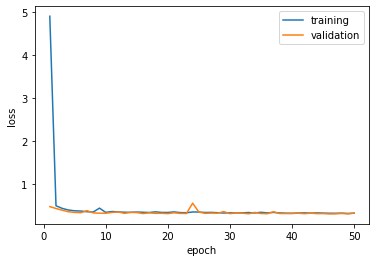

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

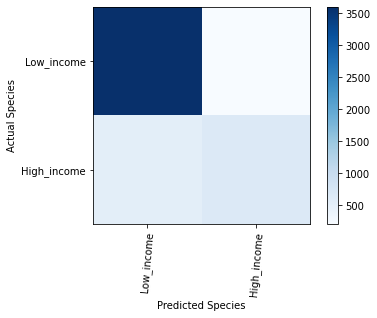

In [ ]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(income_classes))
plt.xticks(tick_marks, income_classes, rotation=85)
plt.yticks(tick_marks, income_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [ ]:
# Save the trained model
modelFileName = 'models/income-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/income-classifier.h5
